In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the cleaned data
df = pd.read_csv('./data/data_clean.csv')

# Optionally, shuffle the data to ensure a random sample
df = df.sample(frac=1, random_state=0).reset_index(drop=True)

# Select a subset of the data for analysis
subset_df = df.head(5000).copy()  # Using a subset

# Correctly parse the cover_date column to datetime format
subset_df['cover_date'] = pd.to_datetime(subset_df['cover_date'], format='%b \'%y', errors='coerce')

# Extract year and month from the cover_date for further analysis
subset_df['cover_year'] = subset_df['cover_date'].dt.year
subset_df['cover_month'] = subset_df['cover_date'].dt.month

# Fill NaN values for cover_year and cover_month with placeholders
subset_df['cover_year'].fillna(0, inplace=True)  # Using 0 as a placeholder
subset_df['cover_month'].fillna(0, inplace=True)

# Fill missing values for numerical features with the median
for column in ['cover_price', 'current_value', 'searched', 'owned', 'issues_total', 'pub_titles_total', 'pub_issues_total']:
    subset_df[column].fillna(subset_df[column].median(), inplace=True)

# Convert boolean columns to integers
bool_columns = ['variant', 'first_appear_event', 'death_event', 'origin_event']
subset_df[bool_columns] = subset_df[bool_columns].astype(int)

# Encode categorical variables as their frequency counts
for column in ['pub_name', 'title', 'volume', 'special']:
    subset_df[column] = subset_df[column].map(subset_df[column].value_counts())

# Define the target variable: whether the comic's value has increased
subset_df['value_increased'] = (subset_df['current_value'] > subset_df['cover_price']).astype(int)

# Splitting the dataset into features (X) and the target variable (y)
X = subset_df.drop(['current_value', 'value_increased', 'cover_date'], axis=1)
y = subset_df['value_increased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.94
Precision: 0.95
Recall: 1.00
F1 Score: 0.97


/var/folders/1x/jp3vqcs53vv9kxc9f40hgztc0000gn/T/ipykernel_48545/2745417859.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  subset_df['cover_year'].fillna(0, inplace=True)  # Using 0 as a placeholder
/var/folders/1x/jp3vqcs53vv9kxc9f40hgztc0000gn/T/ipykernel_48545/2745417859.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

/var/folders/1x/jp3vqcs53vv9kxc9f40hgztc0000gn/T/ipykernel_48545/2515760150.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_comics_cover_prices, y=top_comics_titles_issues_cover_price, palette='coolwarm')


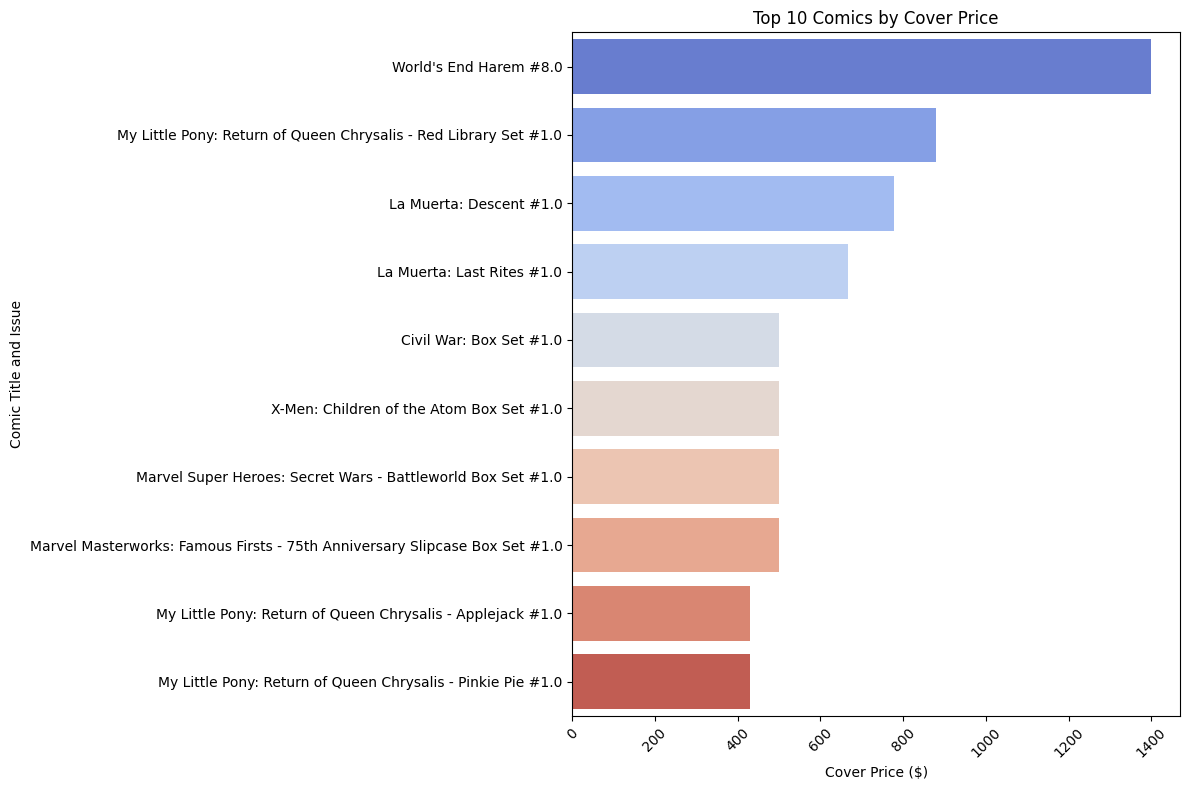

In [10]:
# Visualizing the top 10 comics by cover price
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the original dataframe by 'cover_price' to find the comics with the highest cover prices
top_cover_price_comics = df.sort_values(by='cover_price', ascending=False).head(10)

# Preparing data for visualization focusing on cover price
top_comics_titles_issues_cover_price = top_cover_price_comics['title'].astype(str) + " #" + top_cover_price_comics['issue_nr'].astype(str)
top_comics_cover_prices = top_cover_price_comics['cover_price']

# Creating the visualization with cover price on the x-axis
plt.figure(figsize=(12, 8))
sns.barplot(x=top_comics_cover_prices, y=top_comics_titles_issues_cover_price, palette='coolwarm')
plt.title('Top 10 Comics by Cover Price')
plt.xlabel('Cover Price ($)')
plt.ylabel('Comic Title and Issue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
